# Face detection using pre-trained model

We use following blog as a reference:
[Face detection with OpenCV and deep learning](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)

This assignment has been modified to use Pytorch face detection framework.

# Task 0: Getting familiar with the problem
Start by importing required Python libraries

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# If you are on zoom calls, disable your video and run the cell below.
Start webcam

In [ ]:
# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename

Click 'Capture' to make photo using your webcam.

In [ ]:
# image_file = take_photo()

Read, resize and display the image. 

In [ ]:
# #image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
# image = cv2.imread(image_file)

# # resize it to have a maximum width of 400 pixels
# image = imutils.resize(image, width=400)
# (h, w) = image.shape[:2]
# print(w,h)
# cv2_imshow(image)

# Test the trained model on 
1. General data set http://shuoyang1213.me/WIDERFACE/
2. Masked Face dataset in https://github.com/cabani/MaskedFace-Net

What are the metrics for model evaluation and for test time ?


# Task 1: We intend to use Pytorch MTCNN framework to detect faces
https://towardsdatascience.com/face-detection-neural-network-structure-257b8f6f85d1

https://towardsdatascience.com/mtcnn-face-detection-cdcb20448ce0

In [ ]:
! pip install mtcnn

In [ ]:
import mtcnn
import matplotlib.pyplot as plt
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# pixels = plt.imread(image_file)
# print("Shape of image/array:",pixels.shape)
# imgplot = plt.imshow(pixels)
# plt.show()

In [ ]:
 detector = mtcnn.MTCNN()
# faces = detector.detect_faces(pixels)
# print(np.shape(pixels))

In [ ]:
# print(faces)

In [ ]:
def draw_facebox_im(data, result_list):
 # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
  # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    print("Predicted bbox=",x,y,width, height)
    for key, value in result['keypoints'].items():
      # create and draw dot
      
      dot = plt.Circle(value, radius=5, color='red')
      ax.add_patch(dot)
  # show the plot
  plt.show()

In [ ]:
# draw_facebox_im(pixels, faces)

# Task 2: Monitor performance over a batch of production data (unannotated)
Lets first connect to this new data set with masked faces

In [ ]:
# First lets connect the Gdrive that contains the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/drive/MyDrive/MLOps_Creation/week_2_live')
!ls

Masked_Faces_Dataset


In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
t_transforms = transforms.Compose([transforms.RandomRotation(20),
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor()]) # ToTensor converts images in [0,1] range
num=20

In [ ]:
data = datasets.ImageFolder('./', transform=t_transforms)
dataloader = torch.utils.data.DataLoader(data, batch_size=num)

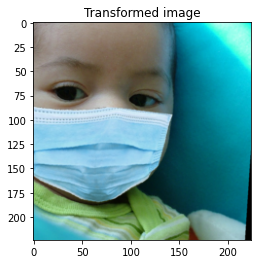

In [ ]:
#Run 3-5 times
for batch in dataloader: # Consider a batch of 1 images at a time
    images, _= batch
    #Lets get an idea of the 
    dat = images[0].cpu().detach()
    plt.imshow(dat.permute(1, 2, 0))
    plt.title('Transformed image')
    break

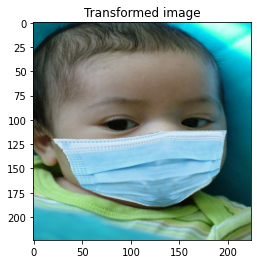

In [ ]:
#Run 3-5 times
for batch in dataloader: # Consider a batch of 1 images at a time
    images, _= batch
    #Lets get an idea of the 
    dat = images[0].cpu().detach()
    plt.imshow(dat.permute(1, 2, 0))
    plt.title('Transformed image')
    break

(224, 224, 3)
For image 0 Confidence =0


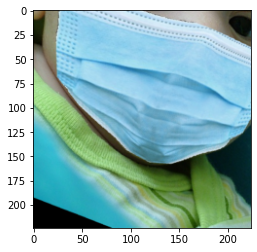

(224, 224, 3)
For image 1 Confidence = 0.9996854066848755
Predicted bbox= 21 36 143 176


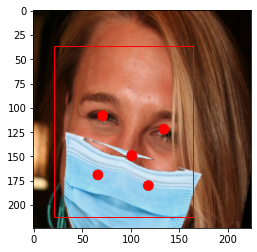

(224, 224, 3)
For image 2 Confidence = 0.9999850988388062
Predicted bbox= 17 46 186 195


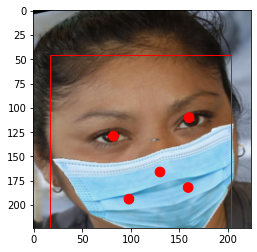

(224, 224, 3)
For image 3 Confidence =0


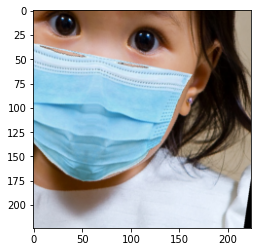

(224, 224, 3)
For image 4 Confidence =0


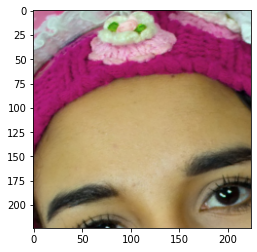

(224, 224, 3)
For image 5 Confidence = 0.9998478889465332
Predicted bbox= 43 35 134 162


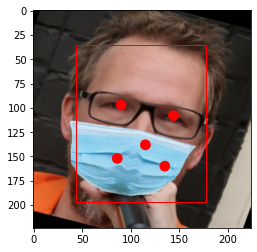

(224, 224, 3)
For image 6 Confidence =0


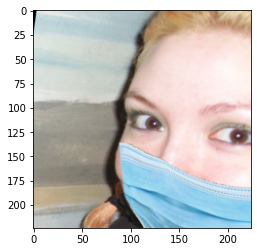

(224, 224, 3)
For image 7 Confidence =0


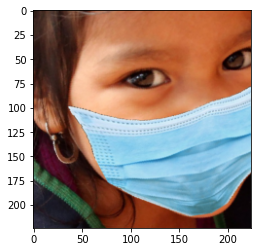

(224, 224, 3)
For image 8 Confidence =0


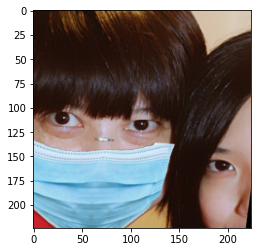

(224, 224, 3)
For image 9 Confidence =0


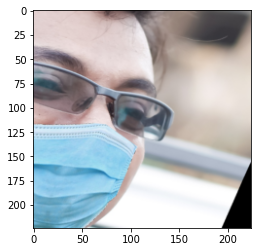

(224, 224, 3)
For image 10 Confidence = 0.9998273253440857
Predicted bbox= -8 36 180 214


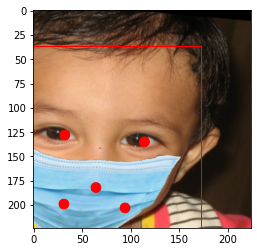

(224, 224, 3)
For image 11 Confidence =0


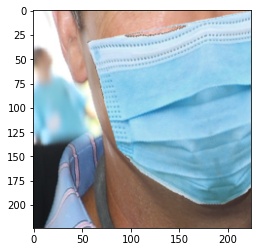

(224, 224, 3)
For image 12 Confidence =0


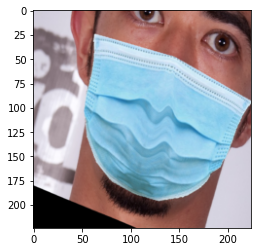

(224, 224, 3)
For image 13 Confidence =0


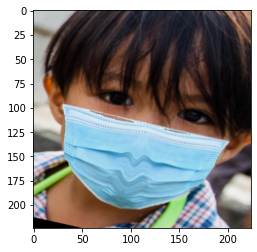

(224, 224, 3)
For image 14 Confidence = 0.9999642372131348
Predicted bbox= 52 59 171 182


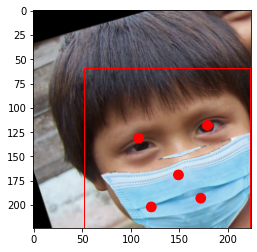

(224, 224, 3)
For image 15 Confidence = 0.9629398584365845
Predicted bbox= -4 -8 170 210


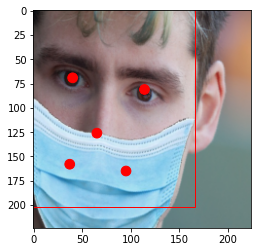

(224, 224, 3)
For image 16 Confidence =0


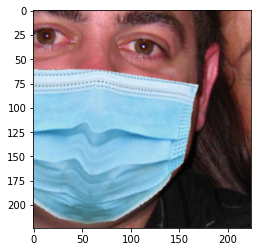

(224, 224, 3)
For image 17 Confidence = 0.9985717535018921
Predicted bbox= 13 27 144 177


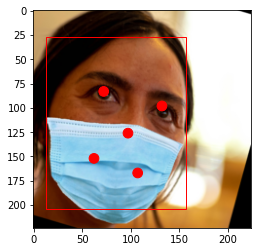

(224, 224, 3)
For image 18 Confidence = 0.999890923500061
Predicted bbox= -15 14 241 288


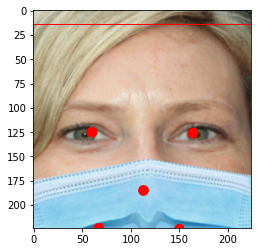

(224, 224, 3)
For image 19 Confidence = 0.9999946355819702
Predicted bbox= 58 40 162 182


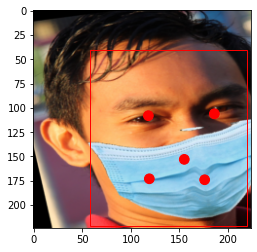

In [ ]:
# Next run bounding box and facial landmark detection on all images
det_faces=[]
for i in range(num):
  
  for batch in dataloader:
    images, _= batch
    dat = images[i].cpu().detach()
    f_img=dat.permute(1, 2, 0).numpy()
    break
  print(np.shape(f_img))
  face=detector.detect_faces(f_img*255)
  if len(face)==0:
    print("For image", i, "Confidence =0")
  else:
      for result in face:
         print("For image", i, "Confidence =",result['confidence'])
  draw_facebox_im(f_img, face)


# So we clearly see that face detection fails for limited facial markers.
# Now we switch to increased number of facial markers (increase from 5 to 68 facial markers)

# Task 3: Facial landmark detection
https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4

In [ ]:
import matplotlib.image as mpimg

In [ ]:
os.getcwd()
os.chdir('..')

In [ ]:
%%capture
if not os.path.exists('./ibug_300W_large_face_landmark_dataset'):
    !wget http://dlib.net/files/data/ibug_300W_large_face_landmark_dataset.tar.gz
    !tar -xvzf 'ibug_300W_large_face_landmark_dataset.tar.gz'    
    !rm -r 'ibug_300W_large_face_landmark_dataset.tar.gz'

# Visualize the dataset

In [ ]:
# file = open('ibug_300W_large_face_landmark_dataset/helen/trainset/100032540_1.pts')
# points = file.readlines()[3:-1]

# landmarks = []

# for point in points:
#     x,y = point.split(' ')
#     landmarks.append([np.floor(float(x)), np.floor(float(y[:-1]))])

# landmarks = np.array(landmarks)
# print("Number of facial landmarks=",len(landmarks))
# plt.figure(figsize=(10,10))
# plt.imshow(mpimg.imread('ibug_300W_large_face_landmark_dataset/helen/trainset/100032540_1.jpg'))
# plt.scatter(landmarks[:,0], landmarks[:,1], s = 5, c = 'g')
# plt.show()

Create Data set Class

In [ ]:
from torch.utils.data import Dataset
import xml.etree.ElementTree as ET 
from PIL import Image
import torchvision.transforms.functional as TF
import random
from math import *

In [ ]:
class Transforms():
    def __init__(self):
        pass
    
    def rotate(self, image, landmarks, angle):
        angle = random.uniform(-angle, +angle)

        transformation_matrix = torch.tensor([
            [+cos(radians(angle)), -sin(radians(angle))], 
            [+sin(radians(angle)), +cos(radians(angle))]
        ])

        image = imutils.rotate(np.array(image), angle)

        landmarks = landmarks - 0.5
        new_landmarks = np.matmul(landmarks, transformation_matrix)
        new_landmarks = new_landmarks + 0.5
        return Image.fromarray(image), new_landmarks

    def resize(self, image, landmarks, img_size):
        image = TF.resize(image, img_size)
        return image, landmarks

    def color_jitter(self, image, landmarks):
        color_jitter = transforms.ColorJitter(brightness=0.3, 
                                              contrast=0.3,
                                              saturation=0.3, 
                                              hue=0.1)
        image = color_jitter(image)
        return image, landmarks

    def crop_face(self, image, landmarks, crops):
        left = int(crops['left'])
        top = int(crops['top'])
        width = int(crops['width'])
        height = int(crops['height'])

        image = TF.crop(image, top, left, height, width)

        img_shape = np.array(image).shape
        landmarks = torch.tensor(landmarks) - torch.tensor([[left, top]])
        landmarks = landmarks / torch.tensor([img_shape[1], img_shape[0]])
        return image, landmarks

    def __call__(self, image, landmarks, crops):
        image = Image.fromarray(image)
        image, landmarks = self.crop_face(image, landmarks, crops)
        image, landmarks = self.resize(image, landmarks, (224, 224))
        image, landmarks = self.color_jitter(image, landmarks)
        image, landmarks = self.rotate(image, landmarks, angle=10)
        
        image = TF.to_tensor(image)
        image = TF.normalize(image, [0.5], [0.5])
        return image, landmarks

In [ ]:
class FaceLandmarksDataset(Dataset):

    def __init__(self, transform=None):

        tree = ET.parse('ibug_300W_large_face_landmark_dataset/labels_ibug_300W_train.xml')
        root = tree.getroot()

        self.image_filenames = []
        self.landmarks = []
        self.crops = []
        self.transform = transform
        self.root_dir = 'ibug_300W_large_face_landmark_dataset'
        
        for filename in root[2]:
            self.image_filenames.append(os.path.join(self.root_dir, filename.attrib['file']))

            self.crops.append(filename[0].attrib)

            landmark = []
            for num in range(68):
                x_coordinate = int(filename[0][num].attrib['x'])
                y_coordinate = int(filename[0][num].attrib['y'])
                landmark.append([x_coordinate, y_coordinate])
            self.landmarks.append(landmark)

        self.landmarks = np.array(self.landmarks).astype('float32')     

        assert len(self.image_filenames) == len(self.landmarks)

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, index):
        image = cv2.imread(self.image_filenames[index], 0)
        landmarks = self.landmarks[index]
        
        if self.transform:
            image, landmarks = self.transform(image, landmarks, self.crops[index])

        landmarks = landmarks - 0.5

        return image, landmarks

dataset = FaceLandmarksDataset(Transforms())

torch.Size([1, 224, 224])


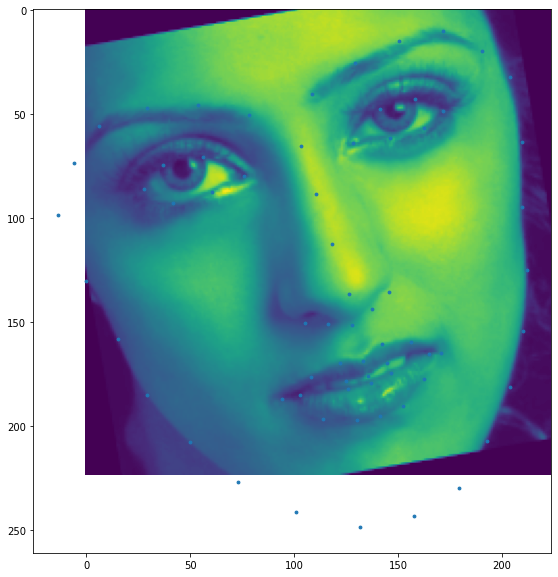

In [ ]:
n_i=5 # change n_i to visualize results on few examples of training data
image, landmarks = dataset[n_i]
print(np.shape(image))
landmarks = (landmarks + 0.5) * 224
plt.figure(figsize=(10, 10))
plt.imshow(image.numpy().squeeze());
plt.scatter(landmarks[:,0], landmarks[:,1], s=8);

## Since there is no pre-trained model here, we will need to train the model

In [ ]:
# Split the data
# split the dataset into validation and test sets
len_valid_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_valid_set

print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))

train_dataset , valid_dataset,  = torch.utils.data.random_split(dataset , [len_train_set, len_valid_set])

# shuffle and batch the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=8, shuffle=True, num_workers=4)

The length of Train set is 6000
The length of Valid set is 666


In [ ]:
!ls

 d3py					 ML_monitoring
 data_banknote_authentication.txt	'MLOps Worksheet.gsheet'
'Distributed ML with GCP.gdoc'		 __pycache__
'End-to-end Pipelines'			 t_model.py
 ibug_300W_large_face_landmark_dataset	 Videos
 MiniKube				 Week_2_DL_Faces
 ML_Deployment				 week_2_live
 MLMonitor-Grafana			'Weekly Introductions'


In [ ]:
# # train the model on a separate model file
from t_model import *
PATH='./Week_2_DL_Faces/'

In [ ]:
# best_network=landmark_train(PATH, train_loader, valid_loader)
best_network=return_pre_trained_network()

In [ ]:
def draw_face_landmarks(img,predictions):
  plt.imshow(img.cpu().numpy().transpose(1,2,0).squeeze())
  plt.scatter(predictions[0,:,0], predictions[0,:,1], c = 'r', s = 5)
  


torch.Size([8, 1, 224, 224])
Total number of test images: 666
Elapsed Time : 2.0889861583709717


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


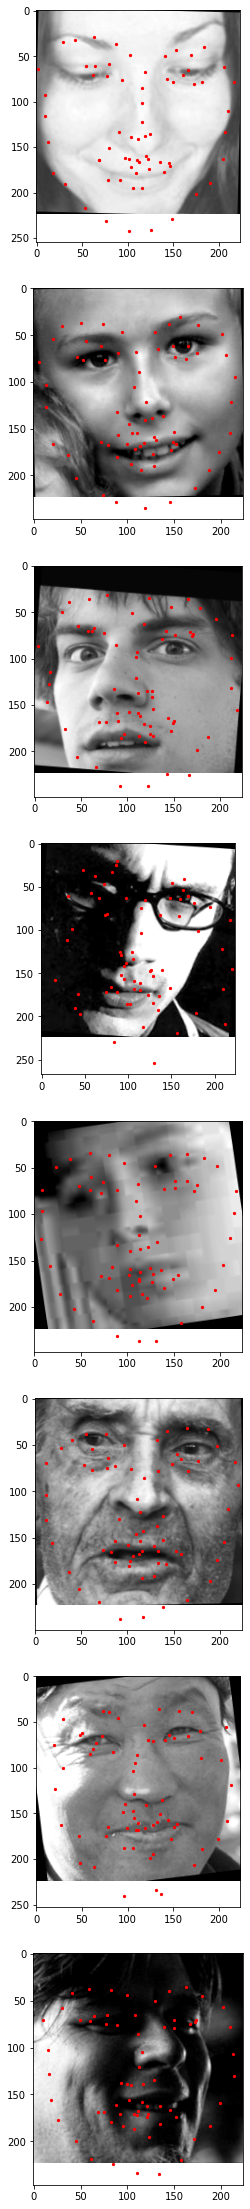

In [ ]:
# Predict on images
## Start monitoring here#####################
import time
start_time = time.time()

with torch.no_grad():

    #Load the best save model from the previous state
    best_network.cuda()
    best_network.load_state_dict(torch.load(PATH+'face_landmarks.pth')) 
    best_network.eval()
    
    images, landmarks = next(iter(valid_loader))
    
    images = images.cuda()
    landmarks = (landmarks + 0.5) * 224
    print(np.shape(images))
    predictions = (best_network(images).cpu() + 0.5) * 224
    predictions = predictions.view(-1,68,2)
        
    plt.figure(figsize=(10,40))
    #print(predictions.shape)
    for img_num in range(8):
        plt.subplot(8,1,img_num+1)
        plt.imshow(images[img_num].cpu().numpy().transpose(1,2,0).squeeze(), cmap='gray')
        plt.scatter(predictions[img_num,:,0], predictions[img_num,:,1], c = 'r', s = 5) #Predictions are in red
        #plt.scatter(landmarks[img_num,:,0], landmarks[img_num,:,1], c = 'g', s = 5)# Actual landmarks are in green

print('Total number of test images: {}'.format(len(valid_dataset)))

end_time = time.time()
print("Elapsed Time : {}".format(end_time - start_time)) 

# Task 4: Finally apply the new model on the masked face data set to observe the results again
Hook up to ML monitor on wandb to visualize confidence fefore and after landmark detection

In [ ]:
%pip install wandb -q
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 5.2MB/s 
     |████████████████████████████████| 133kB 24.0MB/s 
     |████████████████████████████████| 174kB 23.5MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# We need to convert images to grayscale only
pre_process = transforms.Compose(
       [transforms.Grayscale(num_output_channels=1),
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor()])

In [ ]:
# Next run bounding box and facial landmark detection on all images
num=20
new_data=datasets.ImageFolder('./week_2_live/', transform=pre_process)
new_dataloader = torch.utils.data.DataLoader(new_data, batch_size=num)
images, labels  = iter(new_dataloader).next()
# plt.imshow(images[0].cpu().numpy().transpose(1,2,0).squeeze())
# plt.show()
# plt.imshow(images[1].cpu().numpy().transpose(1,2,0).squeeze())
# plt.show()


(20, 68, 2)


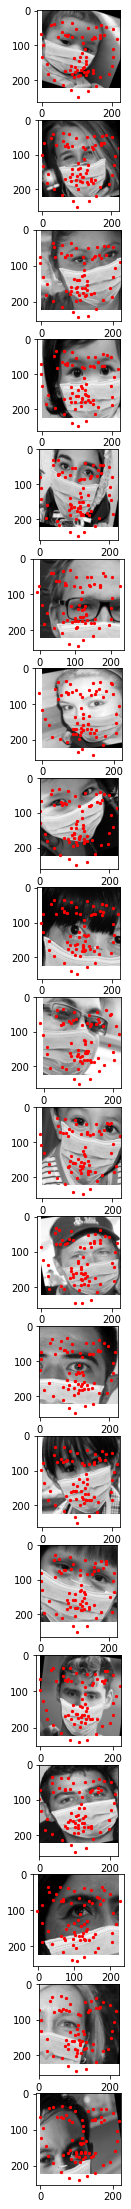

In [ ]:
images, _  = iter(new_dataloader).next()
images=images.cuda()
predictions =(best_network(images).cpu() + 0.5) * 224
predictions = predictions.view(-1,68,2).detach().numpy()
print(predictions.shape)

plt.figure(figsize=(10,40))
for img_num in range(num):
    plt.subplot(num,1,img_num+1)
    plt.imshow(images[img_num].cpu().numpy().transpose(1,2,0).squeeze(), cmap='gray')
          #print(predictions[0,:,0].detach().numpy())
    plt.scatter(predictions[img_num,:,0], predictions[img_num,:,1], c = 'r', s = 5) #Predictions are in red
    
  

In [ ]:
# What metric to monitor now?
# New experiment monitoring here!
#How many landmarks<0 and >224
for i in range(num):
  pred=predictions[i]
  neg_vals=np.shape(np.where(pred<0))[1]
  non_vals=np.shape(np.where(pred>224))[1]
  #print(neg_vals,non_vals)
  landmark_prob=68-(neg_vals+non_vals)
  landmark_prob /=68
  print(landmark_prob)

0.9411764705882353
0.9411764705882353
0.9264705882352942
0.9264705882352942
0.9558823529411765
0.9117647058823529
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9264705882352942
0.9264705882352942
0.9411764705882353
0.9558823529411765
0.9411764705882353
0.9558823529411765
0.9264705882352942
0.9411764705882353
0.9264705882352942
0.9558823529411765
0.9411764705882353
